In [1]:

"""
Translation Model Architecture Exploration
MAI554 Deep Learning Course

This notebook examines the architecture of pretrained translation models,
specifically focusing on transformer-based models available in Hugging Face.

This can be run as a Python script or converted to a Jupyter notebook:
    jupytext --to notebook translation_model_architecture.py
"""

'\nTranslation Model Architecture Exploration\nMAI554 Deep Learning Course\n\nThis notebook examines the architecture of pretrained translation models,\nspecifically focusing on transformer-based models available in Hugging Face.\n\nThis can be run as a Python script or converted to a Jupyter notebook:\n    jupytext --to notebook translation_model_architecture.py\n'

# 🏗️ Understanding Translation Model Architectures 🔍

This notebook explores the architecture of modern neural machine translation (NMT) models, focusing on 
transformer-based models from Hugging Face. We'll load popular translation models, examine their 
architecture details, and gain insights into how they work.

## 📦 Installation and Setup

First, let's install the necessary packages if you haven't already:

In [2]:
# Uncomment and run this cell if you need to install the packages
!pip install transformers torch datasets nltk matplotlib torchinfo torchviz graphviz

## 📚 Import Libraries

In [3]:
import torch
import numpy as np
from transformers import (
    AutoModelForSeq2SeqLM, 
    AutoTokenizer,
    MarianMTModel,
    MarianTokenizer,
    BartForConditionalGeneration,
    BartTokenizer,
    T5ForConditionalGeneration,
    T5Tokenizer
)
import matplotlib.pyplot as plt
from IPython.display import Image, display
from torchinfo import summary
import os
from pathlib import Path
import nltk
import warnings
warnings.filterwarnings('ignore')

# Make sure NLTK data is properly downloaded
# First, check if the directory exists
nltk_data_dir = os.path.expanduser('~/nltk_data')
os.makedirs(nltk_data_dir, exist_ok=True)

# Check if punkt is already downloaded
punkt_dir = os.path.join(nltk_data_dir, 'tokenizers', 'punkt')
if not os.path.exists(punkt_dir):
    print("Downloading NLTK punkt tokenizer data...")
    nltk.download('punkt', download_dir=nltk_data_dir, quiet=False)
else:
    print("NLTK punkt tokenizer data already exists.")

print("Libraries loaded successfully!")

/opt/anaconda3/envs/mai544/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


NLTK punkt tokenizer data already exists.
Libraries loaded successfully!


## 🧩 Different Types of Translation Models

Before we dive into specific architectures, let's understand the main types of translation models in the Hugging Face ecosystem:

1. **MarianMT**: Based on the Marian Neural Machine Translation framework, these are production-ready, lightweight models trained for specific language pairs. Example: "Helsinki-NLP/opus-mt-en-de"

2. **BART**: BART (Bidirectional and Auto-Regressive Transformers) is a denoising autoencoder for pretraining sequence-to-sequence models. Example: "facebook/bart-large"

3. **T5**: Text-to-Text Transfer Transformer is a unified framework that converts all NLP tasks to a text-to-text format. Example: "t5-base"

4. **mBART**: Multilingual BART trained on many languages at once. Example: "facebook/mbart-large-50"

5. **M2M100**: Many-to-many multilingual translation model supporting 100 languages. Example: "facebook/m2m100_418M"

Let's explore a couple of these architectures in detail.

## 🔍 Model 1: MarianMT (Helsinki-NLP/opus-mt-en-de)

We'll start with the MarianMT model, which is commonly used for specific language pairs. Let's load the English-to-German model:

In [4]:
# Load the MarianMT model for English to German translation
model_name = "Helsinki-NLP/opus-mt-en-de"
marian_model = MarianMTModel.from_pretrained(model_name)
marian_tokenizer = MarianTokenizer.from_pretrained(model_name)

print(f"Model loaded: {model_name}")

Model loaded: Helsinki-NLP/opus-mt-en-de


### 📊 Model Architecture Overview

Let's examine the general architecture of the MarianMT model:

In [5]:
# Function to print model architecture at a high level
def print_model_architecture(model):
    print("\n".join([f"- {name}" for name, _ in model.named_children()]))

print("🔍 High-level components of the MarianMT model:")
print_model_architecture(marian_model)

🔍 High-level components of the MarianMT model:
- model
- lm_head


### 🧠 Understanding the Transformer Architecture

The MarianMT model is based on the Transformer architecture, which consists of:

1. **Encoder**: Processes the input sequence (source language)
   - **Self-Attention Layers**: Allow the model to weigh the importance of different words in the input
   - **Feed-Forward Networks**: Further process the self-attention output

2. **Decoder**: Generates the output sequence (target language)
   - **Self-Attention Layers**: Like in the encoder, but masked to prevent looking at future tokens
   - **Encoder-Decoder Attention**: Allows the decoder to focus on relevant parts of the encoder's output
   - **Feed-Forward Networks**: Process the attention outputs

3. **Embedding Layers**: Convert tokens to vectors for both encoder and decoder

4. **Output Layer**: Converts decoder outputs to probability distributions over the vocabulary

In [11]:
# Let's examine the encoder and decoder architecture more closely
if hasattr(marian_model, 'encoder'):
    print("\n🔍 Encoder Architecture:")
    print_model_architecture(marian_model.encoder)
    
    print("\n🔍 Decoder Architecture:")
    print_model_architecture(marian_model.decoder)

### 📈 Model Details and Parameters

Let's get a summary of the model's size and complexity:

In [12]:
# Count the parameters in the model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

total_params = count_parameters(marian_model)
print(f"Total trainable parameters: {total_params:,}")

Total trainable parameters: 74,410,496


### 🔄 Example Translation Process

Let's see how a sentence flows through the model from input to translation:

In [13]:
# Define a sample input sentence
input_text = "Machine translation is transforming natural language processing."

# Tokenize the input
inputs = marian_tokenizer(input_text, return_tensors="pt")
input_ids = inputs["input_ids"]

print(f"Input text: {input_text}")
print(f"Tokenized input (ids): {input_ids[0].tolist()}")
print(f"Tokens: {marian_tokenizer.convert_ids_to_tokens(input_ids[0])}")

# Generate translation
with torch.no_grad():
    output_ids = marian_model.generate(input_ids, max_length=50)

# Decode the output tokens
translated_text = marian_tokenizer.decode(output_ids[0], skip_special_tokens=True)
print(f"\nTranslated text: {translated_text}")

Input text: Machine translation is transforming natural language processing.
Tokenized input (ids): [8853, 6822, 19, 40079, 1328, 1384, 2293, 3, 0]
Tokens: ['▁Machine', '▁translation', '▁is', '▁transforming', '▁natural', '▁language', '▁processing', '.', '</s>']

Translated text: Maschinelle Übersetzung transformiert die natürliche Sprachverarbeitung.


## ⚙️ Detailed Look at Attention Mechanism

The heart of the Transformer architecture is the attention mechanism. Let's understand how it works:

1. **Query, Key, Value Concept**: Each token produces three vectors (Q, K, V)
2. **Attention Weights**: Computed by comparing a token's Query with all Keys
3. **Weighted Sum**: The final output is a weighted sum of Values based on attention weights

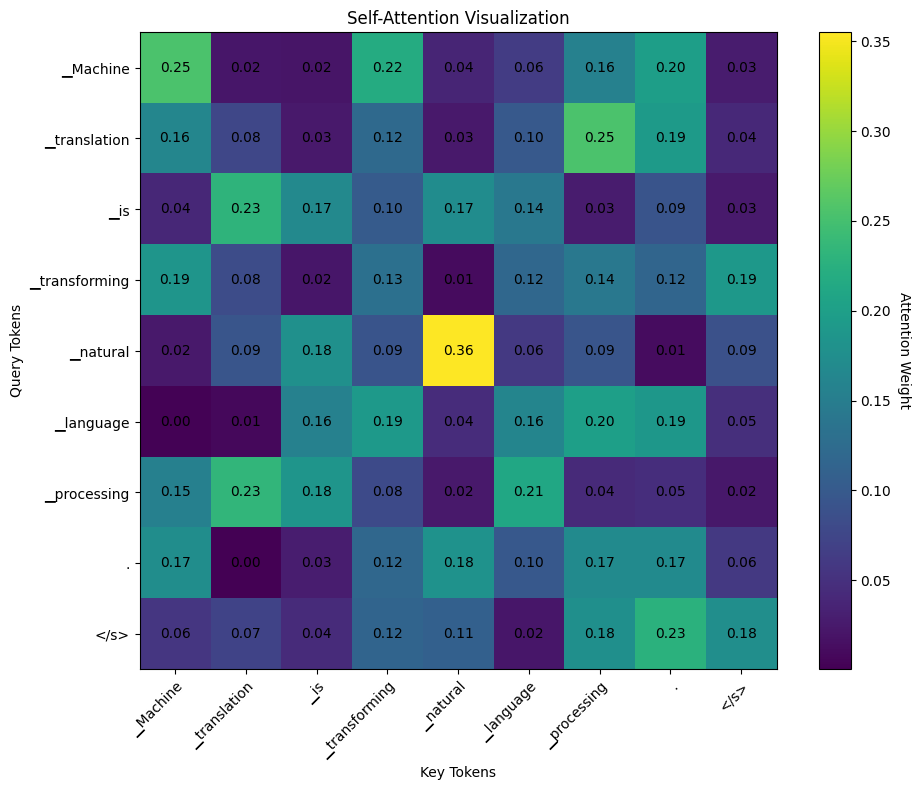

In [14]:
# Let's create a simplified visualization of the self-attention process

def visualize_attention(tokens, attention_matrix=None):
    """Create a simple visualization of attention weights between tokens"""
    if attention_matrix is None:
        # Create a dummy attention matrix if none is provided
        n = len(tokens)
        attention_matrix = np.random.rand(n, n)
        # Normalize rows to simulate softmax
        attention_matrix = attention_matrix / attention_matrix.sum(axis=1, keepdims=True)
    
    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(attention_matrix, cmap='viridis')
    
    # Set labels
    ax.set_xticks(np.arange(len(tokens)))
    ax.set_yticks(np.arange(len(tokens)))
    ax.set_xticklabels(tokens)
    ax.set_yticklabels(tokens)
    
    # Rotate the labels and set alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    cbar.ax.set_ylabel("Attention Weight", rotation=-90, va="bottom")
    
    # Add title and labels
    ax.set_title("Self-Attention Visualization")
    ax.set_xlabel("Key Tokens")
    ax.set_ylabel("Query Tokens")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(tokens)):
        for j in range(len(tokens)):
            text = ax.text(j, i, f"{attention_matrix[i, j]:.2f}",
                          ha="center", va="center", color="w" if attention_matrix[i, j] > 0.5 else "black")
    
    fig.tight_layout()
    plt.show()

# Visualize with a sample attention matrix for the tokenized input
tokens = marian_tokenizer.convert_ids_to_tokens(input_ids[0])
visualize_attention(tokens)

## 🔍 Model 2: T5 Model

Next, let's examine the T5 (Text-to-Text Transfer Transformer) model, which takes a different approach to translation by treating all NLP tasks as text-to-text problems.

In [15]:
# Load the T5 model
t5_model_name = "t5-base"
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)

print(f"Model loaded: {t5_model_name}")

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Model loaded: t5-base


### 📊 T5 Architecture Overview

Now let's look at the high-level architecture of the T5 model:

In [16]:
print("🔍 High-level components of the T5 model:")
print_model_architecture(t5_model)

🔍 High-level components of the T5 model:
- shared
- encoder
- decoder
- lm_head


In [18]:
# Let's examine the encoder and decoder architecture more closely
if hasattr(t5_model_name, 'encoder'):
    print("\n🔍 Encoder Architecture:")
    print_model_architecture(t5_model_name.encoder)
    
    print("\n🔍 Decoder Architecture:")
    print_model_architecture(t5_model_name.decoder)

### 📏 Comparing T5 with MarianMT

The key differences between T5 and MarianMT:

1. **Task Formulation**:
   - T5 treats all NLP tasks as text-to-text problems
   - MarianMT is specifically designed for machine translation

2. **Architecture**:
   - Both use transformer encoders and decoders, but with different implementations
   - T5 uses relative positional embeddings instead of absolute positions

3. **Usage for Translation**:
   - With T5, you need to prefix the input with "translate English to German: "
   - MarianMT is used directly without special prefixes

4. **Pre-training Objectives**:
   - T5 was pre-trained with a masked language modeling objective (similar to BERT)
   - MarianMT was trained specifically on parallel translation corpora

In [17]:
# Let's count the parameters in T5
t5_params = count_parameters(t5_model)
print(f"T5 model trainable parameters: {t5_params:,}")
print(f"MarianMT model trainable parameters: {total_params:,}")
print(f"Ratio of T5 to MarianMT parameters: {t5_params/total_params:.2f}x")

T5 model trainable parameters: 222,903,552
MarianMT model trainable parameters: 74,410,496
Ratio of T5 to MarianMT parameters: 3.00x


### 🎯 Using T5 for Translation

Let's see how to use T5 for translation, which requires prefixing the input:

In [20]:
# Prepare input for T5 (needs the task prefix)
t5_input_text = "translate English to German: " + input_text

# Tokenize input for T5
t5_inputs = t5_tokenizer(t5_input_text, return_tensors="pt")
t5_input_ids = t5_inputs["input_ids"]

print(f"T5 input text: {t5_input_text}")
print(f"T5 tokenized input (ids): {t5_input_ids[0].tolist()}")
print(f"T5 tokens: {t5_tokenizer.convert_ids_to_tokens(t5_input_ids[0])}")

# Generate translation with T5
with torch.no_grad():
    t5_output_ids = t5_model.generate(t5_input_ids, max_length=50)

# Decode the output tokens
t5_translated_text = t5_tokenizer.decode(t5_output_ids[0], skip_special_tokens=True)
print(f"\nT5 translated text: {t5_translated_text}")

# Compare with MarianMT translation
print(f"MarianMT translated text: {translated_text}")

T5 input text: translate English to German: Machine translation is transforming natural language processing.
T5 tokenized input (ids): [13959, 1566, 12, 2968, 10, 5879, 7314, 19, 3, 21139, 793, 1612, 3026, 5, 1]
T5 tokens: ['▁translate', '▁English', '▁to', '▁German', ':', '▁Machine', '▁translation', '▁is', '▁', 'transforming', '▁natural', '▁language', '▁processing', '.', '</s>']

T5 translated text: Die maschinelle Übersetzung wandelt die Verarbeitung natürlicher Sprachen um.
MarianMT translated text: Maschinelle Übersetzung transformiert die natürliche Sprachverarbeitung.


## 🧩 The Building Blocks: Transformer Layers

Let's look deeper at the components that make up these translation models. All transformer-based models follow a similar structure but with variations.

In [21]:
# Function to look at the architecture of a specific layer
def explore_layer(model, layer_name):
    layer = None
    for name, module in model.named_modules():
        if layer_name in name:
            layer = module
            break
    
    if layer:
        print(f"Architecture of {layer_name}:")
        for name, _ in layer.named_children():
            print(f"  - {name}")
    else:
        print(f"Layer {layer_name} not found")

# Let's examine an encoder layer from MarianMT
explore_layer(marian_model, "encoder.layers.0")

# And a decoder layer
explore_layer(marian_model, "decoder.layers.0")

Architecture of encoder.layers.0:
  - self_attn
  - self_attn_layer_norm
  - activation_fn
  - fc1
  - fc2
  - final_layer_norm
Architecture of decoder.layers.0:
  - self_attn
  - activation_fn
  - self_attn_layer_norm
  - encoder_attn
  - encoder_attn_layer_norm
  - fc1
  - fc2
  - final_layer_norm


### 🔄 Forward Pass in Translation Models

Here's a high-level diagram of how data flows through a translation model:

```
Source Text → Tokenization → Embeddings → Encoder → 
Decoder (with Encoder Attention) → Output Layer → Detokenization → Target Text
```

Let's visualize this flow with our example:

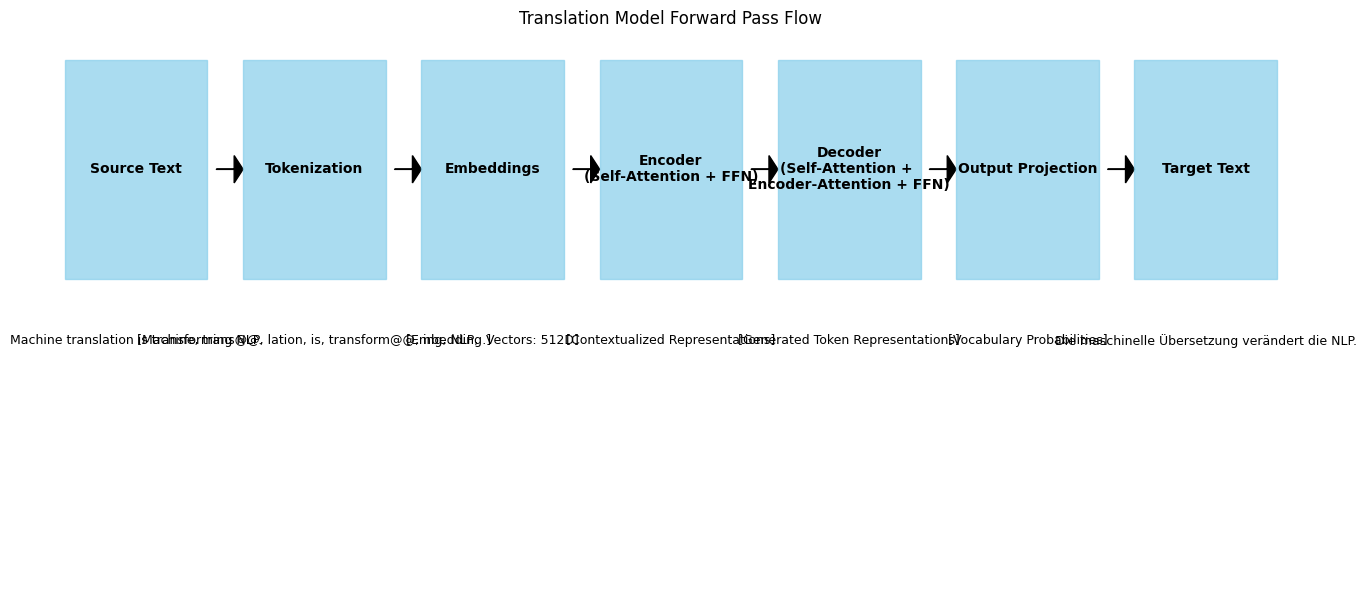

In [22]:
# Simple visualization of the translation flow
def visualize_translation_flow():
    steps = [
        "Source Text", 
        "Tokenization", 
        "Embeddings", 
        "Encoder\n(Self-Attention + FFN)", 
        "Decoder\n(Self-Attention + \nEncoder-Attention + FFN)", 
        "Output Projection", 
        "Target Text"
    ]
    
    example_values = [
        "Machine translation is transforming NLP.",
        "[Machine, trans@@, lation, is, transform@@, ing, NLP, .]",
        "[Embedding Vectors: 512D]",
        "[Contextualized Representations]",
        "[Generated Token Representations]",
        "[Vocabulary Probabilities]",
        "Die maschinelle Übersetzung verändert die NLP."
    ]
    
    # Create flow diagram
    fig, ax = plt.subplots(figsize=(14, 6))
    y_positions = [0] * len(steps)
    x_positions = list(range(len(steps)))
    
    # Draw boxes and arrows
    for i, (step, value) in enumerate(zip(steps, example_values)):
        # Draw box
        rect = plt.Rectangle((i-0.4, -0.4), 0.8, 0.8, fill=True, color='skyblue', alpha=0.7)
        ax.add_patch(rect)
        ax.text(i, 0, step, ha='center', va='center', fontweight='bold')
        
        # Draw example value
        ax.text(i, -0.6, value, ha='center', va='top', fontsize=9, wrap=True)
        
        # Draw arrow
        if i < len(steps) - 1:
            ax.arrow(i+0.45, 0, 0.1, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')
    
    ax.set_xlim(-0.5, len(steps) - 0.5)
    ax.set_ylim(-1.5, 0.5)
    ax.set_title('Translation Model Forward Pass Flow')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

visualize_translation_flow()

## 🧮 Encoding and Decoding Process

Let's break down the encoding and decoding processes in more detail:

### Encoding Process:
1. **Tokenization**: Split text into subword tokens
2. **Embedding**: Convert tokens to vectors
3. **Positional Encoding**: Add position information
4. **Self-Attention**: Capture relationships between tokens
5. **Feed-Forward Network**: Process each position independently

### Decoding Process:
1. **Auto-regressive Generation**: Generate one token at a time
2. **Masked Self-Attention**: Prevent looking at future tokens
3. **Encoder-Decoder Attention**: Focus on relevant parts of the source
4. **Output Projection**: Convert to vocabulary probabilities
5. **Beam Search**: Explore multiple translation possibilities

In [23]:
# Let's see how beam search affects translation quality with MarianMT
def compare_beam_search_sizes(model, tokenizer, input_text, beam_sizes=[1, 3, 5]):
    inputs = tokenizer(input_text, return_tensors="pt")
    
    translations = {}
    for beam_size in beam_sizes:
        with torch.no_grad():
            outputs = model.generate(
                inputs['input_ids'],
                max_length=50,
                num_beams=beam_size,
                early_stopping=True
            )
        translation = tokenizer.decode(outputs[0], skip_special_tokens=True)
        translations[beam_size] = translation
    
    return translations

beam_search_results = compare_beam_search_sizes(marian_model, marian_tokenizer, input_text)

print("🔍 Effect of beam search size on translation:")
for beam_size, translation in beam_search_results.items():
    print(f"\nBeam size {beam_size}: {translation}")

🔍 Effect of beam search size on translation:

Beam size 1: Maschinelle Übersetzung transformiert die natürliche Sprachverarbeitung.

Beam size 3: Maschinelle Übersetzung transformiert die natürliche Sprachverarbeitung.

Beam size 5: Maschinelle Übersetzung transformiert die natürliche Sprachverarbeitung.


## 🌟 Key Innovations in Translation Models

Modern translation models have several innovations that improve quality:

1. **Subword Tokenization**: Handles rare words and morphologically rich languages
2. **Multi-head Attention**: Captures different types of relationships
3. **Layer Normalization**: Stabilizes training
4. **Residual Connections**: Helps with gradient flow
5. **Beam Search Decoding**: Explores multiple translation candidates
6. **Shared Embeddings**: Reuses knowledge between languages
7. **Byte-Pair Encoding (BPE)**: Effective subword segmentation

Original text: Machine translation models are transforming multilingual communication.
Tokenized into 8 tokens: ['▁Machine', '▁translation', '▁models', '▁are', '▁transforming', '▁multilingual', '▁communication', '.']
Token IDs: [8853, 6822, 3288, 48, 40079, 33196, 2355, 3, 0]


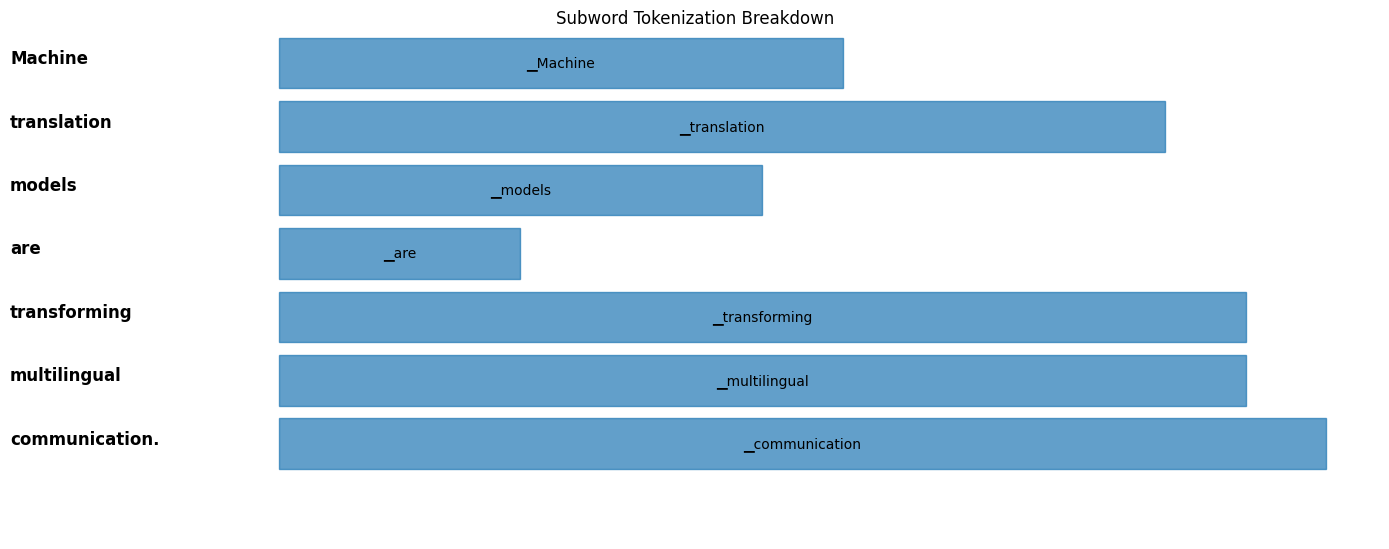

In [24]:
# Let's look at the tokenization process in more detail
def explore_tokenization(tokenizer, text):
    # Get subword tokens
    tokens = tokenizer.tokenize(text)
    
    # Get IDs
    input_ids = tokenizer.encode(text)
    
    # Display the tokenization
    print(f"Original text: {text}")
    print(f"Tokenized into {len(tokens)} tokens: {tokens}")
    print(f"Token IDs: {input_ids}")
    
    # Visualize the subword breakdown
    words = text.split()
    subwords_by_word = []
    
    token_idx = 0
    for word in words:
        word_tokens = []
        word_len = len(word)
        
        # Find tokens that belong to this word
        # Note: This is approximate as tokenizers may behave differently
        while token_idx < len(tokens) and (word.startswith(tokens[token_idx].replace('▁', '')) or 
                                          tokens[token_idx].replace('▁', '').startswith(word) or
                                          '@@' in tokens[token_idx]):
            word_tokens.append(tokens[token_idx])
            token_idx += 1
            
            # Break if we've collected enough tokens for this word
            if ''.join(t.replace('▁', '').replace('@@', '') for t in word_tokens) == word or \
               ''.join(t.replace('▁', '').replace('@@', '') for t in word_tokens).startswith(word):
                break
        
        subwords_by_word.append((word, word_tokens))
    
    # Plot the breakdown
    fig, ax = plt.subplots(figsize=(14, len(words) * 0.8))
    
    for i, (word, subwords) in enumerate(subwords_by_word):
        ax.text(0, -i, word, fontsize=12, fontweight='bold')
        
        x_offset = 0.5
        for j, subword in enumerate(subwords):
            subword_display = subword.replace('▁', '').replace('@@', '')
            width = len(subword_display) * 0.15
            
            rect = plt.Rectangle((x_offset, -i - 0.4), width, 0.8, 
                                 fill=True, color=f'C{j%10}', alpha=0.7)
            ax.add_patch(rect)
            ax.text(x_offset + width/2, -i, subword, 
                    ha='center', va='center', fontsize=10)
            
            x_offset += width + 0.1
    
    ax.set_xlim(0, x_offset)
    ax.set_ylim(-len(words) - 0.5, 0.5)
    ax.set_title('Subword Tokenization Breakdown')
    ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Check how the sample sentence gets tokenized
complex_text = "Machine translation models are transforming multilingual communication."
explore_tokenization(marian_tokenizer, complex_text)

## 🚀 Pushing the Boundaries: Recent Innovations

Recent innovations in translation models include:

1. **Multilingual Models**: Single models that can translate between many language pairs
2. **Document-Level Translation**: Models that consider the broader context
3. **Non-Autoregressive Translation**: Generating all output tokens in parallel
4. **Adapter-Based Fine-tuning**: Efficiently adapting models to new language pairs
5. **Prompt-Based Translation**: Using large language models with prompts for translation
6. **Low-Resource Languages**: Specialized techniques for languages with limited data

## 🔄 Translation Quality and Evaluation

Let's compare the quality of our translations from different models:

In [25]:
# More complex examples to compare model outputs
test_sentences = [
    "The sophisticated algorithm processes complex sentences with multiple clauses.",
    "Neural networks have revolutionized machine translation in recent years.",
    "The cat sat on the mat, watching the birds outside.",
    "I would like to visit Berlin next summer if possible."
]

print("🔄 Comparing translations between MarianMT and T5:")
print("=" * 80)

for i, sentence in enumerate(test_sentences):
    print(f"\nExample {i+1}: {sentence}")
    
    # MarianMT translation
    inputs = marian_tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = marian_model.generate(**inputs, max_length=50)
    marian_translation = marian_tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    # T5 translation
    t5_input = "translate English to German: " + sentence
    t5_inputs = t5_tokenizer(t5_input, return_tensors="pt")
    with torch.no_grad():
        t5_outputs = t5_model.generate(**t5_inputs, max_length=50)
    t5_translation = t5_tokenizer.decode(t5_outputs[0], skip_special_tokens=True)
    
    print(f"\nMarianMT: {marian_translation}")
    print(f"T5:      {t5_translation}")
    print("-" * 80)

🔄 Comparing translations between MarianMT and T5:

Example 1: The sophisticated algorithm processes complex sentences with multiple clauses.

MarianMT: Der ausgefeilte Algorithmus verarbeitet komplexe Sätze mit mehreren Klauseln.
T5:      Der ausgeklügelte Algorithmus verarbeitet komplexe Sätze mit mehreren Klauseln.
--------------------------------------------------------------------------------

Example 2: Neural networks have revolutionized machine translation in recent years.

MarianMT: Neuronale Netzwerke haben die maschinelle Übersetzung in den letzten Jahren revolutioniert.
T5:      Neurale Netzwerke haben die maschinelle Übersetzung in den letzten Jahren revolutioniert.
--------------------------------------------------------------------------------

Example 3: The cat sat on the mat, watching the birds outside.

MarianMT: Die Katze saß auf der Matte und beobachtete die Vögel draußen.
T5:      Die Katze saß auf der Matte und beobachtete die Vögel draußen.
----------------------

## 🧠 Understanding the Limitations

Translation models have several limitations to be aware of:

1. **Context limitations**: Most models process sentences independently
2. **Idiomatic expressions**: Difficult to translate culturally-specific phrases
3. **Ambiguity**: Words with multiple meanings can be mistranslated
4. **Low-resource languages**: Less accurate for languages with limited training data
5. **Domain specificity**: Models may perform poorly on specialized content
6. **Hallucinations**: Models can generate plausible but incorrect translations

In [ ]:
# Example demonstrating some limitations
challenging_examples = [
    "The bat flew around the cave.",  # Ambiguous word "bat"
    "It's raining cats and dogs outside.",  # Idiomatic expression
    "I'll put the kettle on.",  # Cultural expression
    "The patient presented with acute appendicitis."  # Domain-specific medical
]

print("💭 Examples demonstrating translation limitations:")
print("=" * 80)

for i, sentence in enumerate(challenging_examples):
    print(f"\nExample {i+1}: {sentence}")
    
    # MarianMT translation
    inputs = marian_tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = marian_model.generate(**inputs, max_length=50)
    translation = marian_tokenizer.decode(outputs[0], skip_special_tokens=True)
    
    print(f"Translation: {translation}")
    
    if i == 0:
        print("Note: 'Bat' could mean a flying mammal or a sports equipment - ambiguous.")
    elif i == 1:
        print("Note: This is an idiomatic expression meaning 'It's raining heavily'.")
    elif i == 2:
        print("Note: Cultural expression that might translate literally rather than idiomatically.")
    elif i == 3:
        print("Note: Medical terminology may not be accurately translated without domain training.")
        
    print("-" * 80)

## 🌟 Conclusion

In this notebook, we've explored:

1. **Model Architectures**: The encoder-decoder transformer structure behind modern translation models
2. **Translation Process**: How text flows through the model from input to output
3. **Tokenization**: How models break text into subword units
4. **Attention Mechanism**: The key innovation enabling high-quality translation
5. **Model Comparison**: Differences between MarianMT and T5 approaches
6. **Limitations**: Important considerations when using translation models

These models demonstrate the power of transformers for natural language processing, particularly in the domain of machine translation. While they have limitations, they've dramatically improved translation quality compared to previous approaches.

## 📚 Further Reading

- [Attention Is All You Need](https://arxiv.org/abs/1706.03762) - The original Transformer paper
- [Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer](https://arxiv.org/abs/1910.10683) - T5 paper
- [Marian: Fast Neural Machine Translation in C++](https://aclanthology.org/W18-2716.pdf) - Marian paper 